# What caused the massive dropdown in CO2 in Russia and Ukraine ?

In this notebook we will do analysis from the year 1985 till 1995 in Russia and Ukraine to see what caused the massive dropdown in CO2 emissions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

In [2]:
data_root = './data/'
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')

In the notebook where we calculated CO2 emissions by country (**CO2_emissions_by_country.ipynb**) we noticed the massive dropdown in CO2 in Ukraine and in Russia. Here we will precisely see which year did that happen and what was the cause of that . Did the CO2 drop massively only in Russia and Ukraine or were there more countries?

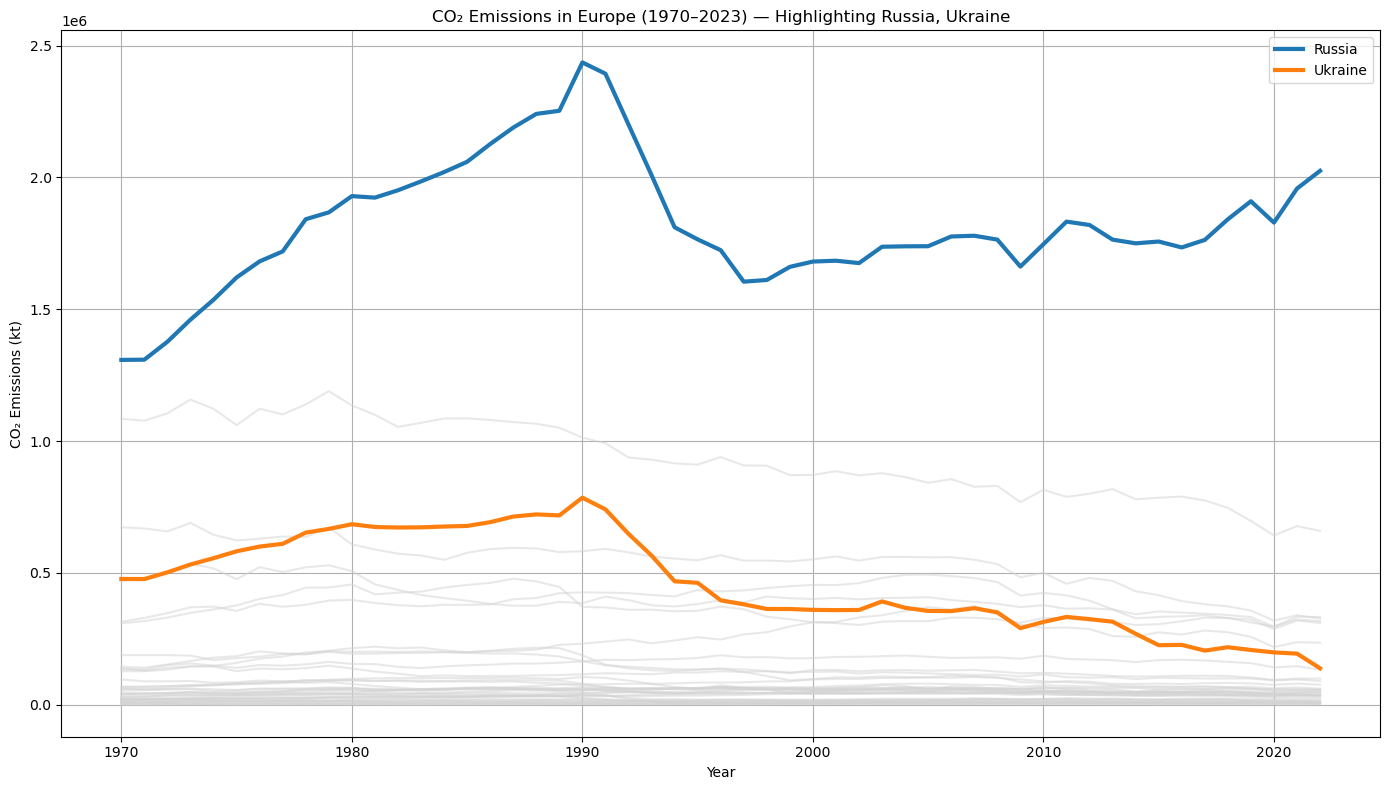

In [3]:
# Filter for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = 'Russia'

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus]).drop_duplicates()

# Extract year columns for 1985–2000
selected_years = [str(year) for year in range(1970, 2023)]
df_plot = df_co2_europe.set_index("Name")[selected_years].T
df_plot.index = df_plot.index.astype(int)
plt.figure(figsize=(14, 8))

for country in df_plot.columns:
    if country in ['Russia', 'Ukraine']:
        plt.plot(df_plot.index, df_plot[country], label=country, linewidth=3)
    else:
        plt.plot(df_plot.index, df_plot[country], color='lightgray', alpha=0.5)

plt.title('CO₂ Emissions in Europe (1970–2023) — Highlighting Russia, Ukraine')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***Plot: CO₂ Emissions (1985–2000) for Russia and Ukraine***

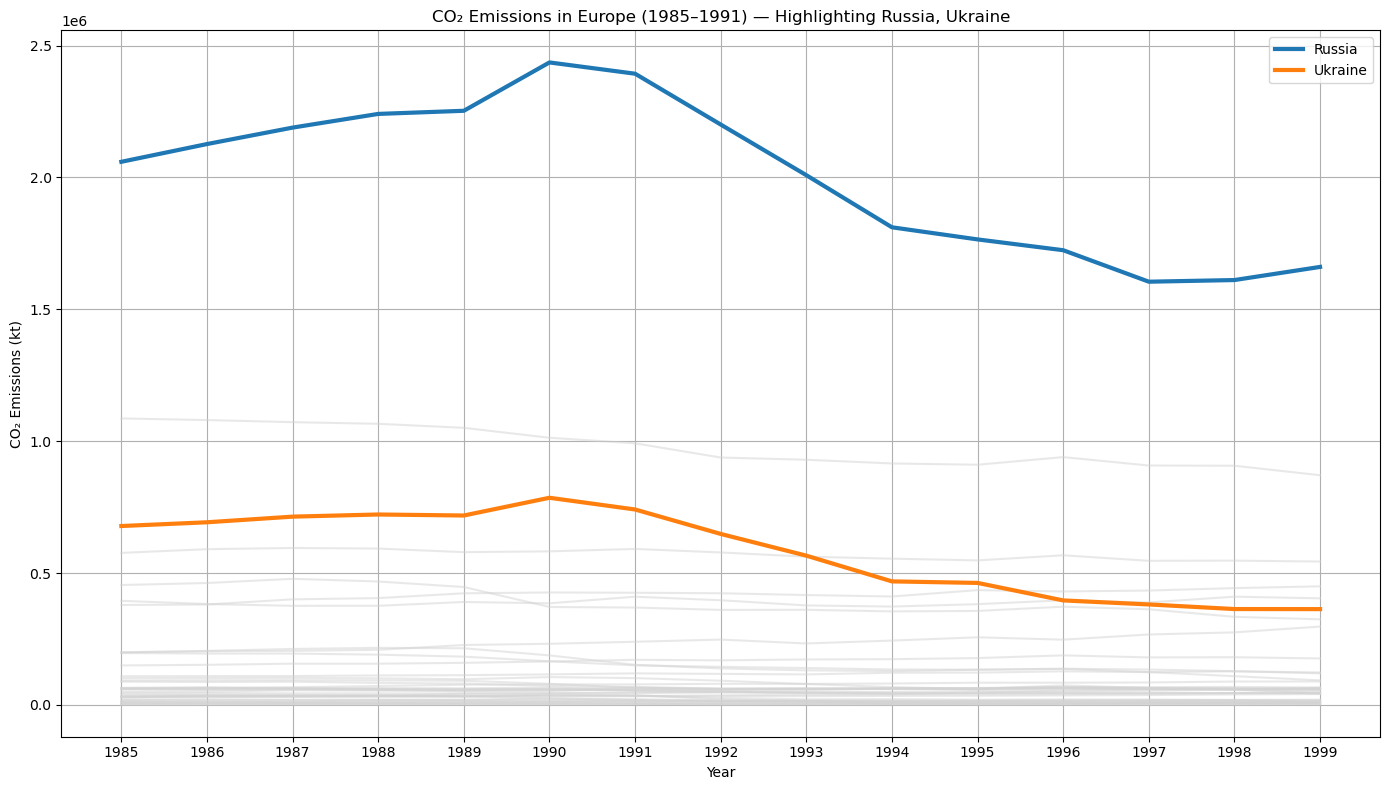

In [4]:
selected_years = [str(year) for year in range(1985, 2000)]
df_plot = df_co2_europe.set_index("Name")[selected_years].T
plt.figure(figsize=(14, 8))

for country in df_plot.columns:
    if country in ['Russia', 'Ukraine']:
        plt.plot(df_plot.index, df_plot[country], label=country, linewidth=3)
    else:
        plt.plot(df_plot.index, df_plot[country], color='lightgray', alpha=0.5)

plt.title('CO₂ Emissions in Europe (1985–1991) — Highlighting Russia, Ukraine')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We see from this detailed plot that in 1990 we had a small dropdown in CO₂, and then from 1991 to 1994 it started dropping rapidly. The reason behind this was the collapse of the Soviet Union in 1991, which triggered a severe economic crisis in Russia, Ukraine, and other post-Soviet states.

As industries shut down, energy consumption dropped dramatically, especially in energy-intensive sectors like manufacturing, mining, and heavy industry. The transition from a centrally planned economy to a market economy caused a massive decline in industrial output, fuel shortages, and a breakdown of the unified Soviet energy system. This led directly to a sharp decrease in fossil fuel use, and thus, a major reduction in CO₂ emissions across the region.

Next we will calculate and compare the dropdown percent of CO2 emissions between Russia and Ukraine so we can nearly see how much did the collapse of the Societ Union influence the industries and the CO2 emissions.

In [5]:
# Years for comparison
year_before = '1990'
year_after = '1995'

# Create a table for % drop
drops = []

for country in ['Russia', 'Ukraine']:
    emissions_1990 = df_co2_europe[df_co2_europe['Name'] == country][year_before].values[0]
    emissions_1995 = df_co2_europe[df_co2_europe['Name'] == country][year_after].values[0]
    percent_drop = ((emissions_1990 - emissions_1995) / emissions_1990) * 100
    drops.append((country, emissions_1990, emissions_1995, percent_drop))

df_drops = pd.DataFrame(drops, columns=['Country', '1990 CO₂ (kt)', '1995 CO₂ (kt)', '% Drop'])
print(df_drops)

   Country  1990 CO₂ (kt)  1995 CO₂ (kt)     % Drop
0   Russia    2436259.192   1.765190e+06  27.545076
1  Ukraine     785544.685   4.626363e+05  41.106304


If we said that the reason behind this dropdown was the collapse of the Soviet Union than it seemes logical that the other countires that were in that union had the same consequence. Let's check that out by normalising CO2 emissions in each european country that was in the Soviet Union , calculate the dropdown percent and analyse the results .  

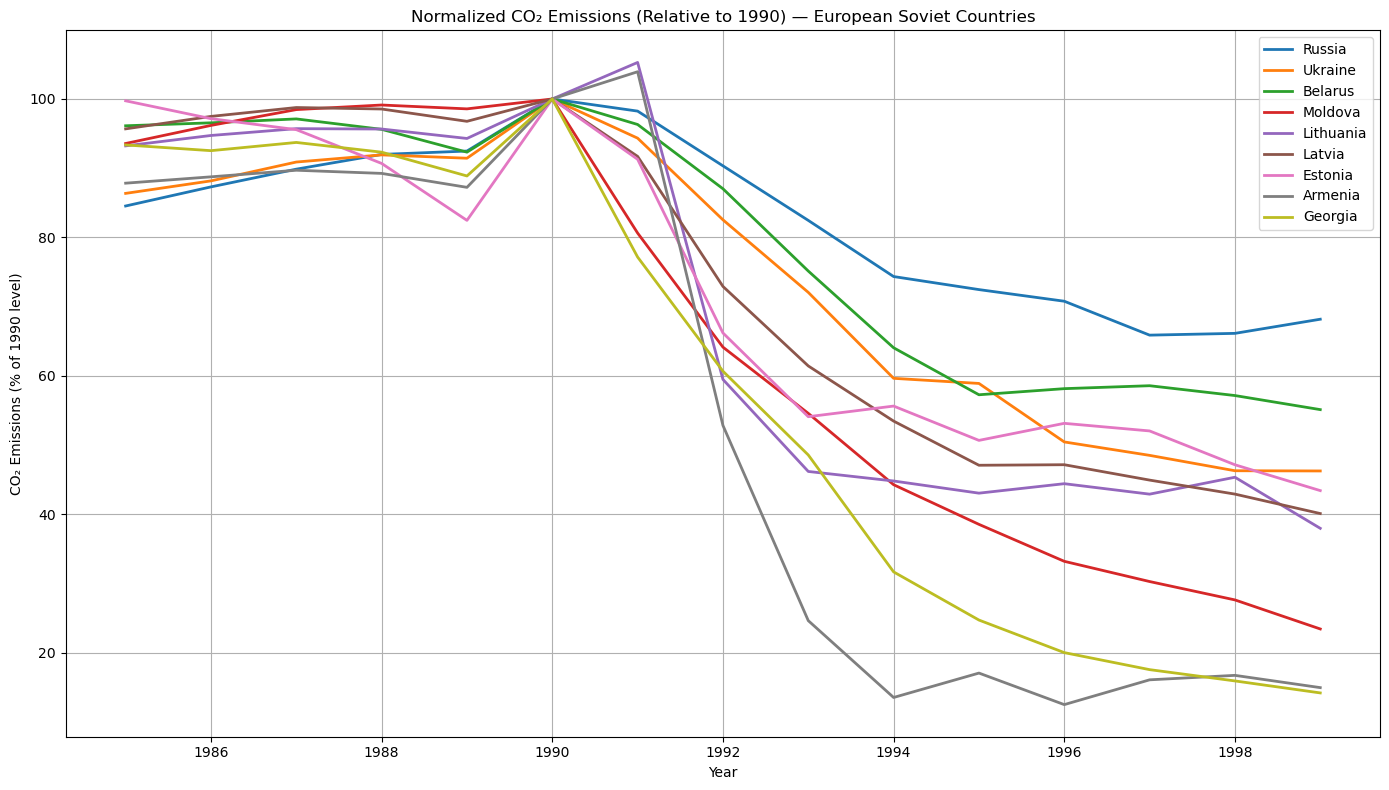

     Country  % Drop 1990-1995
7    Armenia         82.958687
8    Georgia         75.297327
3    Moldova         61.469566
4  Lithuania         56.960810
5     Latvia         52.928824
6    Estonia         49.336065
2    Belarus         42.742231
1    Ukraine         41.106304
0     Russia         27.545076


In [6]:
# List of European Soviet countries to analyze (the USSR republics in Europe)
euro_soviet_countries = [
    'Russia', 'Ukraine', 'Belarus', 'Moldova', 'Lithuania', 
    'Latvia', 'Estonia', 'Armenia', 'Georgia',  # Georgia and Armenia are sometimes considered transcontinental
]

# Filter European countries + the Soviet ones (replace names as needed)
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Extract each Soviet country dataframe and fix the name if needed
dfs = []
for country in euro_soviet_countries:
    if country == 'Russia':
        df_temp = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
        df_temp['Name'] = 'Russia'
    elif country == 'Moldova':
        df_temp = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
        df_temp['Name'] = 'Moldova'
    else:
        df_temp = df_co2[df_co2['Name'].str.contains(country, case=False, na=False)].copy()
    dfs.append(df_temp)

# Combine all data
df_soviet_europe = pd.concat(dfs).drop_duplicates()

# Select years as strings
year_columns = [str(year) for year in range(1985, 2000)]

# Keep only relevant columns
df_soviet_europe = df_soviet_europe[['Name'] + year_columns]

# Normalize emissions by 1990 for each country (percentage relative to 1990)
for country in df_soviet_europe['Name'].unique():
    mask = df_soviet_europe['Name'] == country
    base_value = df_soviet_europe.loc[mask, '1990'].values[0]
    # Avoid division by zero
    if base_value == 0:
        df_soviet_europe.loc[mask, year_columns] = 0
    else:
        df_soviet_europe.loc[mask, year_columns] = df_soviet_europe.loc[mask, year_columns].div(base_value).mul(100)

# Transpose for plotting
df_plot = df_soviet_europe.set_index('Name')[year_columns].T
df_plot.index = df_plot.index.astype(int)

# Plot normalized emissions over time
plt.figure(figsize=(14, 8))
for country in df_plot.columns:
    plt.plot(df_plot.index, df_plot[country], label=country, linewidth=2)

plt.title('Normalized CO₂ Emissions (Relative to 1990) — European Soviet Countries')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (% of 1990 level)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate % drop from 1990 to 1995
drop_df = []
for country in df_soviet_europe['Name'].unique():
    emissions_1990 = df_soviet_europe.loc[df_soviet_europe['Name'] == country, '1990'].values[0]
    emissions_1995 = df_soviet_europe.loc[df_soviet_europe['Name'] == country, '1995'].values[0]
    if emissions_1990 == 0:
        drop_pct = None
    else:
        drop_pct = (1 - emissions_1995 / emissions_1990) * 100
    drop_df.append({'Country': country, '% Drop 1990-1995': drop_pct})

df_drop = pd.DataFrame(drop_df).sort_values(by='% Drop 1990-1995', ascending=False)

print(df_drop)

Our results show that we were 100 percent right about the reason behind the dropdown. All the countries that were in the Soviet Union had a rapid decreasing in CO2 emissions and the country that had the biggest percentage was Armenia. That seemes logical cause Armenia in that period of time had :

- Nagorno-Karabakh conflict (1988–1994): Military tensions with Azerbaijan disrupted borders and trade.

- Blockade by neighboring countries: Severely limited access to energy supplies (especially gas and oil).

- Shut down of the Metsamor Nuclear Power Plant after the 1988 earthquake (until 1995).

- Severe energy crisis in the early 1990s (frequent blackouts and limited industrial activity).

Let's extend our analysis by examining how the former Soviet European countries recovered after the CO₂ emissions crash — specifically from 1995 to 2005.
We'll do three things:

- Visualize normalized CO₂ emissions (1990 = 100%) from 1990 to 2005

- Calculate the % change from 1995 to 2005 to see which countries recovered (or continued to decline)

- Interpret the results in historical and economic context

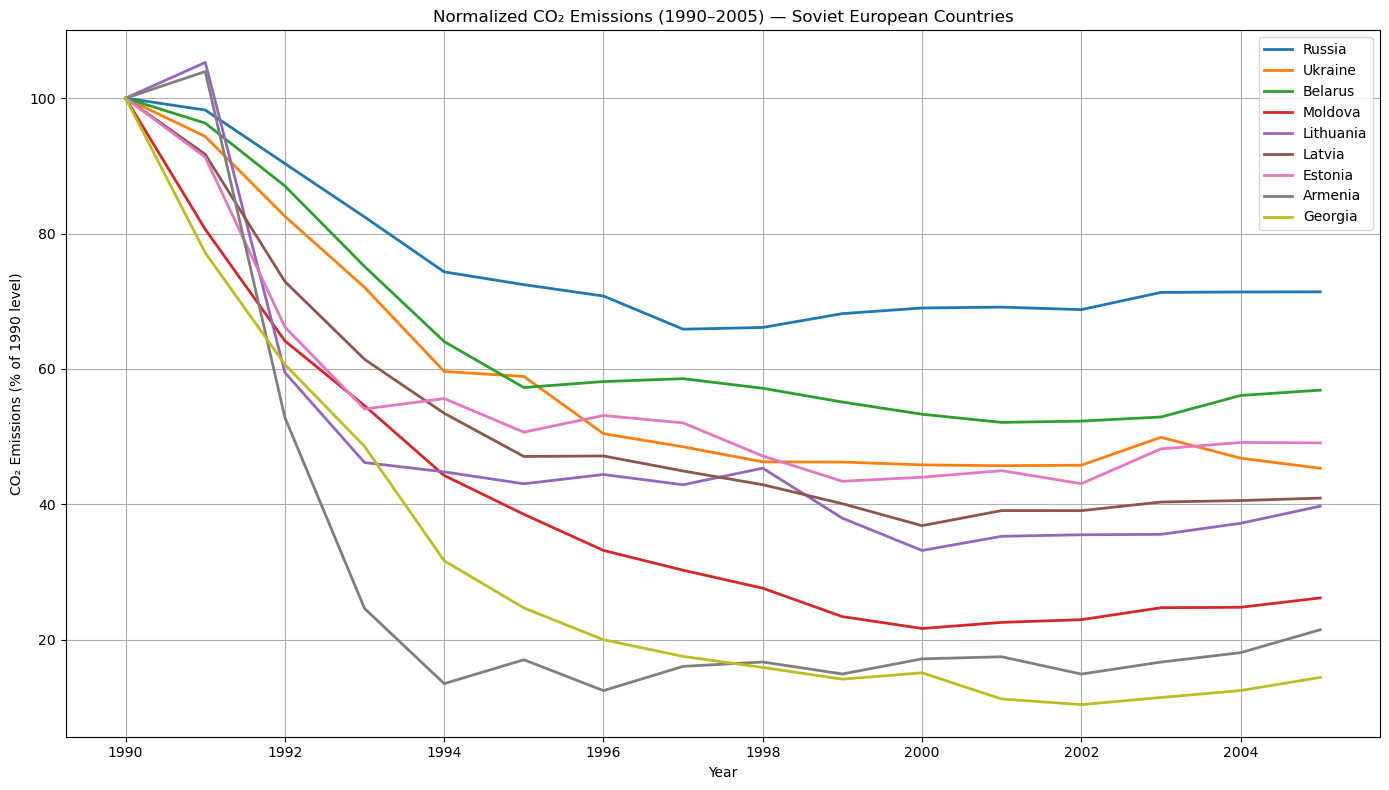

In [7]:
# Years to analyze
extended_years = [str(year) for year in range(1990, 2006)]

# Reload base data
df_recovery = pd.concat(dfs).drop_duplicates()
df_recovery = df_recovery[['Name'] + extended_years]

# Normalize to 1990 levels
for country in df_recovery['Name'].unique():
    mask = df_recovery['Name'] == country
    base_value = df_recovery.loc[mask, '1990'].values[0]
    if base_value == 0:
        df_recovery.loc[mask, extended_years] = 0
    else:
        df_recovery.loc[mask, extended_years] = df_recovery.loc[mask, extended_years].div(base_value).mul(100)

# Transpose for plotting
df_plot = df_recovery.set_index('Name')[extended_years].T
df_plot.index = df_plot.index.astype(int)

# Plot
plt.figure(figsize=(14, 8))
for country in df_plot.columns:
    plt.plot(df_plot.index, df_plot[country], label=country, linewidth=2)

plt.title('Normalized CO₂ Emissions (1990–2005) — Soviet European Countries')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (% of 1990 level)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the graph, we can observe that after the collapse of the Soviet Union, these countries initially experienced a sharp decline in CO₂ emissions, reflecting a period of economic weakness and industrial disruption. However, over time, most of them began to recover, and their emissions gradually stabilized or started to rise again—indicating that their industries were slowly getting back on track.